# L4

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

Load "SP500.csv" file using 'pd.read_csv'. 
Make "year" column as the index by specifying 'index_col'.

In [2]:
df = pd.read_csv("../Data/SP500.csv", index_col='year')
df

,dividendYield,Peratio,ShillerPEratio,10yearTyield,SP500level
year,,,,,
1950,0.0744,7.47,11.90,0.0257,21.21
1951,0.0602,9.95,12.53,0.0268,24.19
1952,0.0541,10.86,13.01,0.0283,26.18
1953,0.0584,10.10,12.00,0.0248,25.46
1954,0.0440,12.58,15.99,0.0261,35.60
...,...,...,...,...,...
2015,0.0211,22.18,24.21,0.0209,1918.60
2016,0.0203,23.59,28.06,0.0243,2275.12
2017,0.0185,24.97,33.31,0.0258,2789.80


Add 'annual_return' colummn. You can use the function `pct_change()` to calculate annual returns from the 'SP500level'.

In [3]:
df['annual_return'] = df['SP500level'].pct_change()
df

,dividendYield,Peratio,ShillerPEratio,10yearTyield,SP500level,annual_return
year,,,,,,
1950,0.0744,7.47,11.90,0.0257,21.21,NaN
1951,0.0602,9.95,12.53,0.0268,24.19,0.140500
1952,0.0541,10.86,13.01,0.0283,26.18,0.082265
1953,0.0584,10.10,12.00,0.0248,25.46,-0.027502
1954,0.0440,12.58,15.99,0.0261,35.60,0.398272
...,...,...,...,...,...,...
2015,0.0211,22.18,24.21,0.0209,1918.60,-0.054029
2016,0.0203,23.59,28.06,0.0243,2275.12,0.185823
2017,0.0185,24.97,33.31,0.0258,2789.80,0.226221


Draw annual return graph using `plot()` method from pandas.
'set_title' function can specify the title of the graph.

[Text(0, 0.5, 'Annual Return'), Text(0.5, 0, 'Year')]

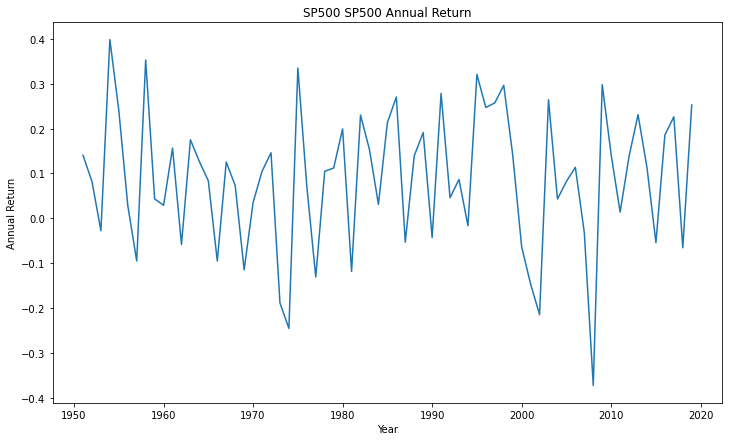

In [4]:
ax = df['annual_return'].plot(figsize = (12, 7))
ax.set_title("SP500 SP500 Annual Return")
ax.set(xlabel="Year", ylabel="Annual Return")

Plot the dividiend yield as well. 
To plot another column with different y-axis scale, we can use `secondary_y` parameter and then specify the column name you like to draw together.
Change the style of the line with `style` parameter. `-` means solid line and `--` means dashed line.

Text(0.5, 1.0, 'SP500 SP500 Divident Yield & Annual Return')

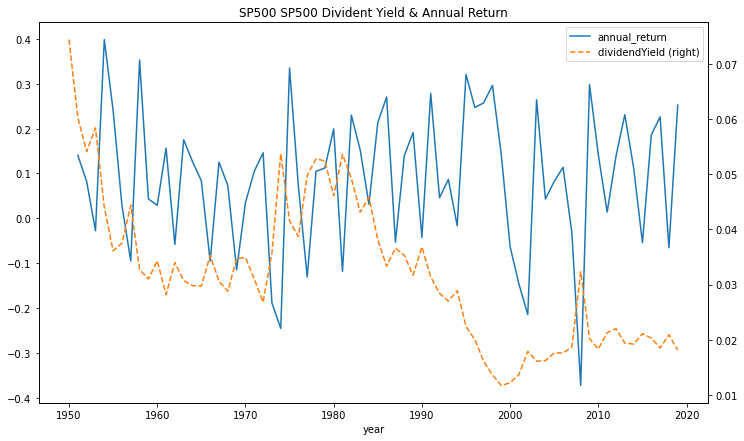

In [5]:
columns_to_plot = ['annual_return', 'dividendYield']
ax = df[columns_to_plot].plot(figsize = (12, 7), secondary_y = 'dividendYield', style = ['-','--'])
ax.set_title("SP500 SP500 Divident Yield & Annual Return")

We're going to shift the 'annual_return' column with `shift()` method from pandas. 
If the argument is a positive number, it will shift down. 
If the argument is negative number, it will shift one cell up.
The default is to shift one down.

In [6]:
return_shifted = df.copy()
return_shifted['annual_return'] = return_shifted['annual_return'].shift(-1)
return_shifted

,dividendYield,Peratio,ShillerPEratio,10yearTyield,SP500level,annual_return
year,,,,,,
1950,0.0744,7.47,11.90,0.0257,21.21,0.140500
1951,0.0602,9.95,12.53,0.0268,24.19,0.082265
1952,0.0541,10.86,13.01,0.0283,26.18,-0.027502
1953,0.0584,10.10,12.00,0.0248,25.46,0.398272
1954,0.0440,12.58,15.99,0.0261,35.60,0.240169
...,...,...,...,...,...,...
2015,0.0211,22.18,24.21,0.0209,1918.60,0.185823
2016,0.0203,23.59,28.06,0.0243,2275.12,0.226221
2017,0.0185,24.97,33.31,0.0258,2789.80,-0.065385


Use the `corr()` method from pandas.

In [7]:
return_shifted['annual_return'].corr(return_shifted['dividendYield'])

0.23975697555928685

In [8]:
return_shifted['annual_return'].corr(return_shifted['Peratio'])

-0.05627754214493599

In [9]:
return_shifted['annual_return'].corr(return_shifted['ShillerPEratio'])

-0.19116434171142993

In [10]:
yield_shifted = return_shifted.copy()
yield_shifted['10yearTyield'] = yield_shifted['10yearTyield'].shift(-1)
yield_shifted['annual_return'].corr(yield_shifted['10yearTyield'])

-0.03346616937676412

Save the DataFrame to a csv file.

In [11]:
df.to_csv("../Data/SP500_data.csv")